# Introduction to Seaborn


## Python Visualization Landscape

The python visualization landscape is complex and can be overwhelming.   

How did we get there? (see [Jake Vanderplas' talk]( https://www.youtube.com/watch?v=FytuB8nFHPQ) at PyCon 2017)


<center>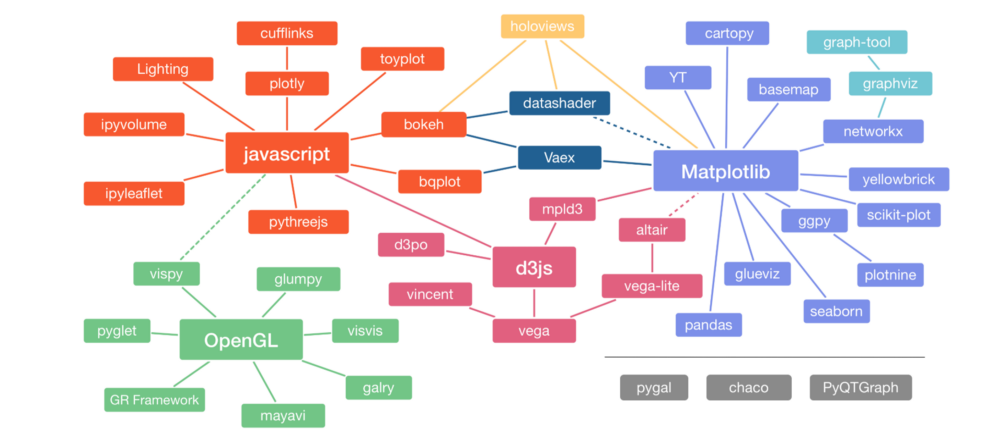</center> Source: [medium.org](https://sophiamyang.medium.com/python-visualization-landscape-3b95ede3d030)

Matplotlib provides the raw building blocks for Seaborn's visualizations and it can also be used on its own. As we can see Pandas also supports basic plotting capability.

## Anatomy of a Figure

<center>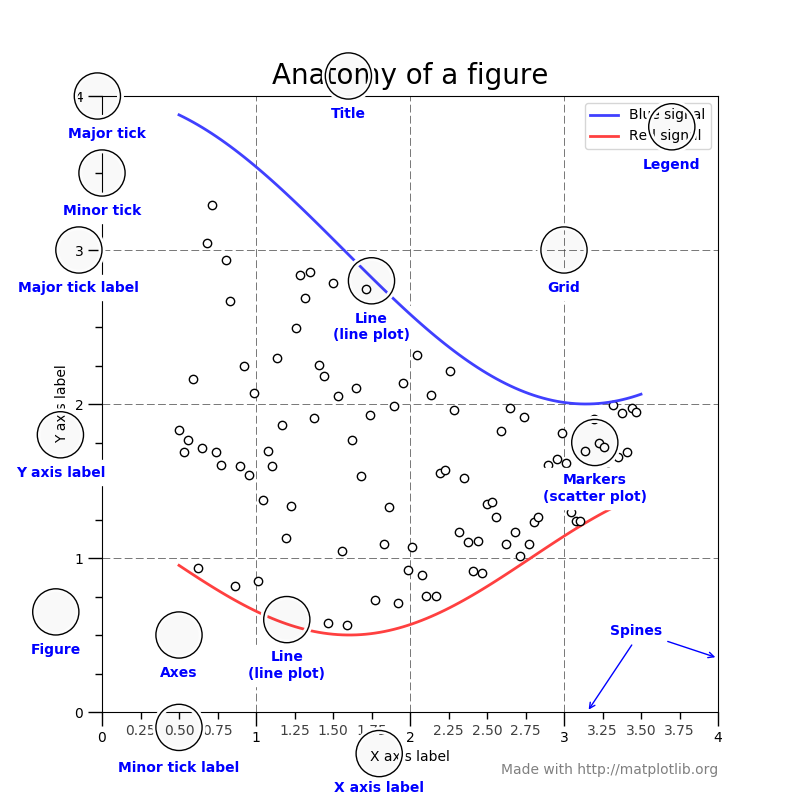</center>


## Seaborn vs. Matplotlib
Seaborn is a visualisation library useful for creating statistical graphs in Python. It provides appealing default styles and colour palettes to enhance the visual impact of statistical graphs. It is built on top of the matplotlib library and is also integrated in terms of pandas data structures.

Why should we learn Seaborn if we already knwo Matplotlib?

* Matplotlib is mainly deployed for basic plotting. It is highly customizable and doing sophisticated visualization is possible, however it requires a lot of boilerplate code. And since it predated Pandas by more than a decade, it is not designed for use with Pandas `DataFrame`.
* Seaborn in the other hand specializes in statistics visualization and is more integrated to work with pandas and provides a lot of commonly used themes.

So if you are doing stats then seaborn is a good choice.  
Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors:

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [2]:
# Disable jedi autocompleter
%config Completer.use_jedi = False

# Global figure size
plt.rcParams['figure.figsize'] = 9, 4

# We do this to ignore several specific warnings
warnings.filterwarnings('ignore')

In [3]:
# Create random walk data:
rwlk = np.random.RandomState(123)
x = np.linspace(0, 10, 500)
y = np.cumsum(rwlk.randn(500, 6), 0)

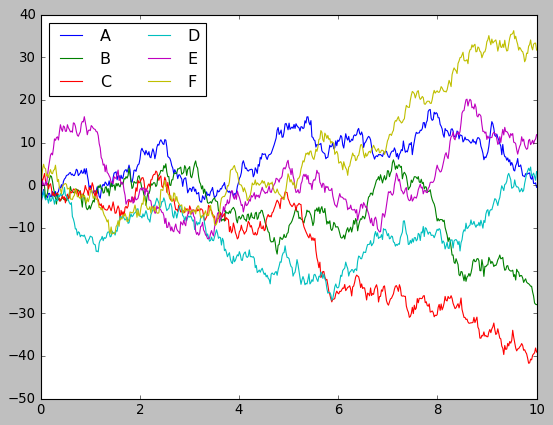

In [4]:
# Plot the data with Matplotlib defaults
plt.style.use('classic')
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Now let's plot the same data using seaborn. By convension, Seaborn is imported as `sns`:

In [5]:
import seaborn as sns
sns.set()

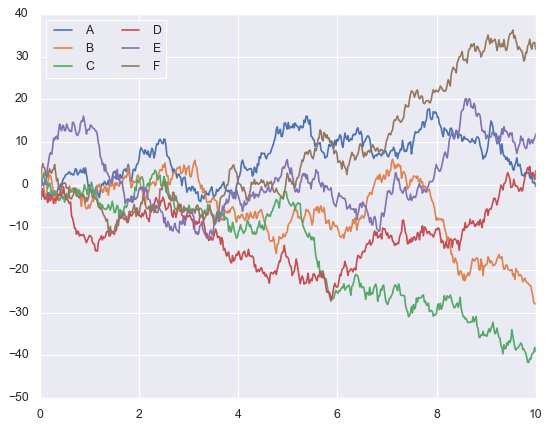

In [6]:
# same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although we used the same plotting code for both figures and the results of both plots contain all the information we'd like to convey, seaborn plot resutl is aesthetically more pleasing, isn't it?

## Setting Styles

Seaborn has default configurations that can be applied with `sns.set()`. These styles can override matplotlib and pandas plots as well. It comes with five built-in themes to syle its plots: `dark`, `whitegrid`, `dark`, `white` and `ticks`.

To use any of the preset themes use `sns.set_style()`

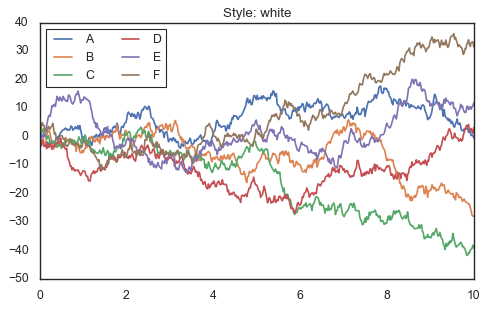

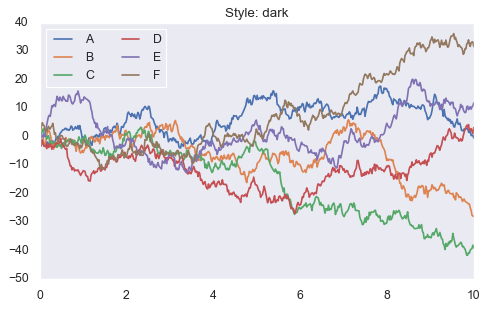

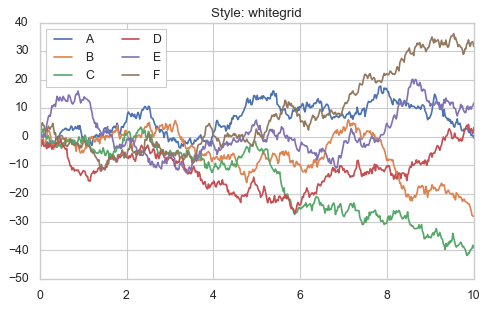

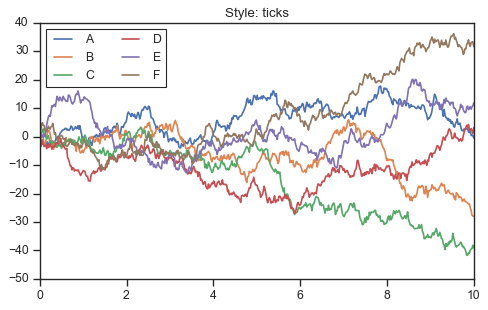

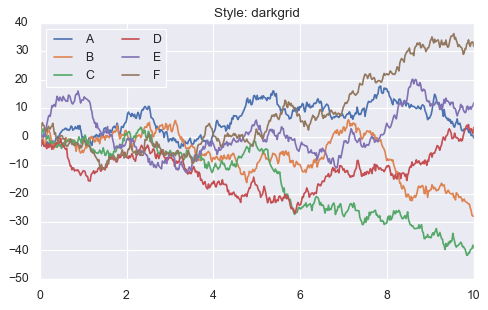

In [7]:
styles = ['white', 'dark', 'whitegrid', 'ticks', 'darkgrid']
for style in styles:
    sns.set_style(style)
    plt.figure(figsize=(7,4))
    plt.plot(x, y)
    plt.title(f'Style: {style}')
    plt.legend('ABCDEF', ncol=2, loc='upper left');

Note: Matplotlib has some other pretty styles integrated, that you can use with seaborn too with the command `plt.style.use()`

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Exploring Seaborn Plots

The core feature of Seaborn is to provide high-level commands to create with less code a variety of chart types that are useful for exploring statistical data and even creating some statistical models.  

Let's take a look at some of the chart types available in Seaborn using `employee.csv` dataset:

In [9]:
df = pd.read_csv('data/employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<div class="alert alert-block alert-warning">
<b>Employee attrition:</b> or staff chrn rate referes to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. With attrition, an employer will not fill the vacancy left by the former employee. It can reduce costs when an organization may be facing financial distress and is usally considered more of an amicable or cordial depature from the organization.</div>

### Bar Charts

A bar chart or bar graph is a chaart that presents categorical data with rectengular bars with hights or lengths proportional to the values that they represent. Can be plotted vertically or horizontally.

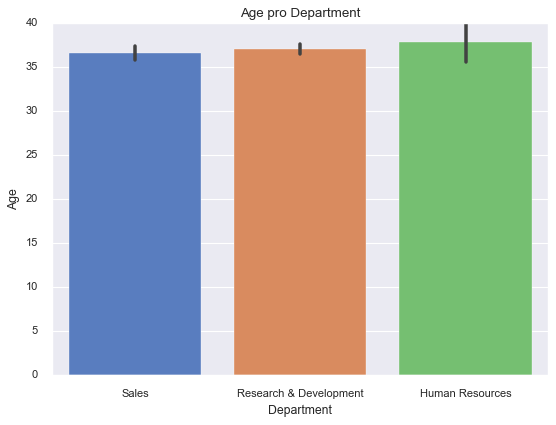

In [10]:
plt.rcParams["figure.figsize"] = 10, 5
plt.style.use('seaborn-notebook')
sns.barplot(x=df['Department'],
            y=df['Age'],
            palette='muted')
plt.title('Age pro Department');

Seaborn in fact has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. These span a range of average luminance and saturation values:

In [11]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [12]:
sns.color_palette("magma_r", 8)

[(0.996369, 0.791167, 0.553499),
 (0.992196, 0.587502, 0.406299),
 (0.944006, 0.377643, 0.365136),
 (0.804752, 0.249911, 0.442102),
 (0.620005, 0.18384, 0.497524),
 (0.445163, 0.122724, 0.506901),
 (0.265447, 0.060237, 0.46184),
 (0.092949, 0.059904, 0.239164)]

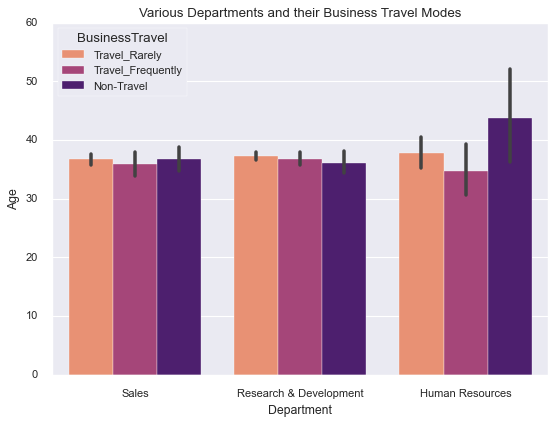

In [13]:
# plotting the chart
sns.barplot(x=df['Department'], y=df['Age'], 
            hue=df['BusinessTravel'], 
            palette='magma_r')
plt.title('Various Departments and their Business Travel Modes');

### Count Plots

`countplot()` method is used to Show the counts of observations in each categorical bin using bars.

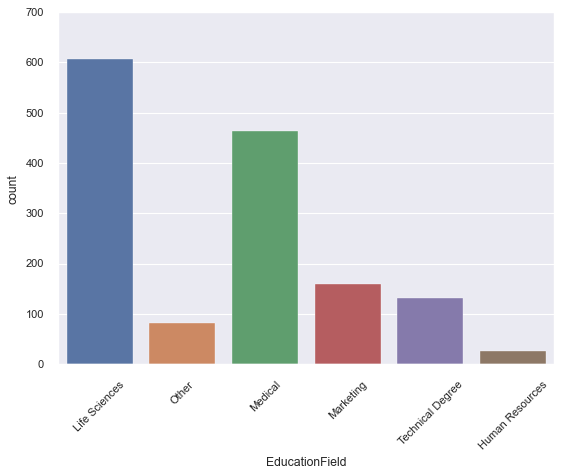

In [14]:
# plotting a simple count plot
sns.countplot(df['EducationField'])
plt.xticks(rotation = 45)
plt.show()

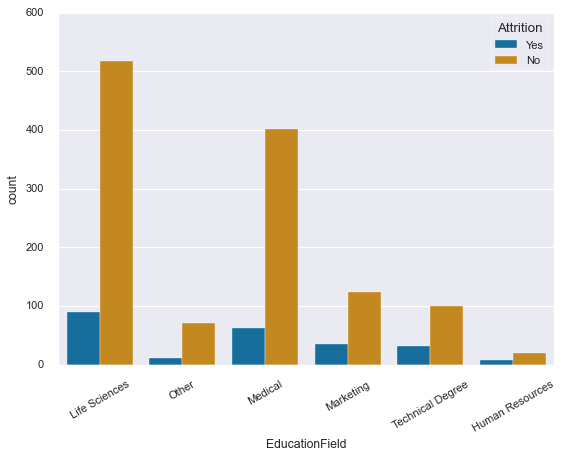

In [15]:
# plotting a count plot with hue
sns.countplot(x=df['EducationField'],
              hue=df['Attrition'],
              palette='colorblind')
plt.xticks(rotation=30);

### Line Charts

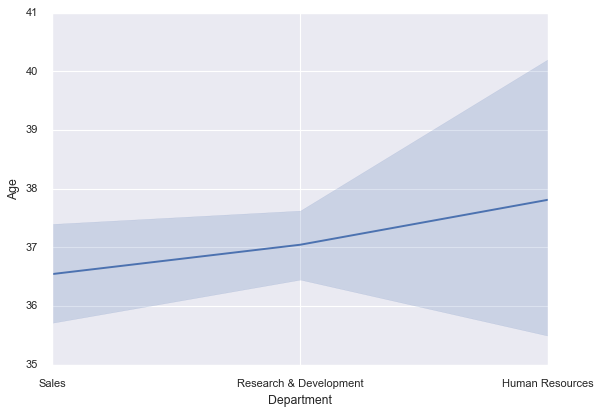

In [16]:
# lets plot a simple line plot
sns.lineplot(x=df['Department'],
             y=df['Age']);
# 'Avg. Age of Employees in different Departments'

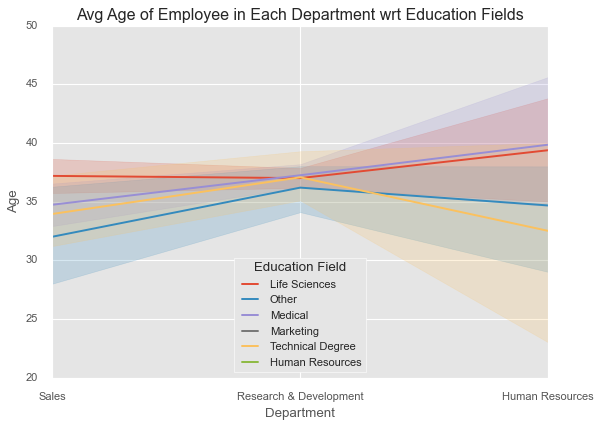

In [17]:
# lets introduce a hue into the plot
plt.style.use('ggplot')
sns.lineplot(x=df['Department'],
             y=df['Age'],
             hue=df['EducationField'])
plt.legend(loc='lower center', title='Education Field')
plt.title('Avg Age of Employee in Each Department wrt Education Fields');

### Scatter Charts

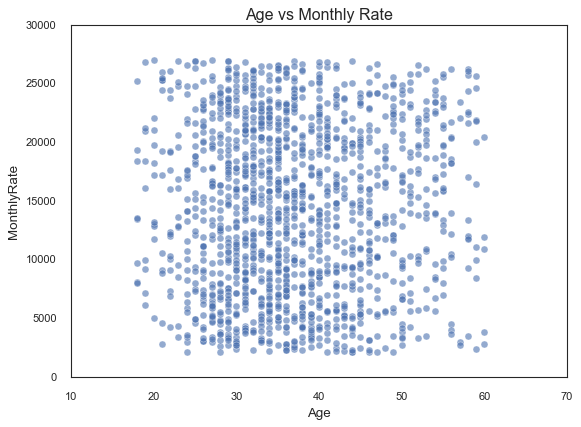

In [18]:
sns.set_style('white')
# scatter plot
sns.scatterplot(x=df['Age'],
                y=df['MonthlyRate'], s=40, alpha=.6)
plt.title('Age vs Monthly Rate');

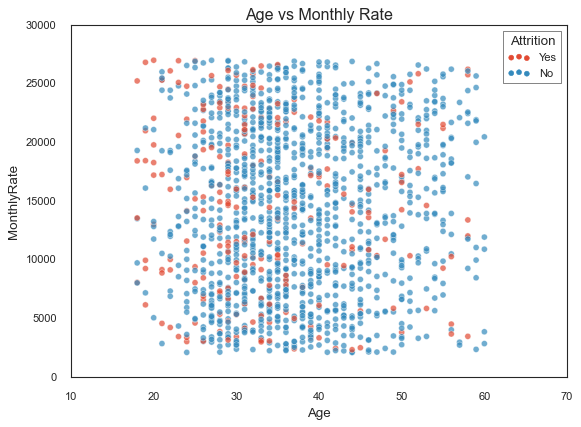

In [19]:
# lets add a hue element in the data
sns.scatterplot(x=df['Age'],
                y=df['MonthlyRate'],
                hue=df['Attrition'], s=30, alpha=.7)
plt.title('Age vs Monthly Rate')
plt.show()

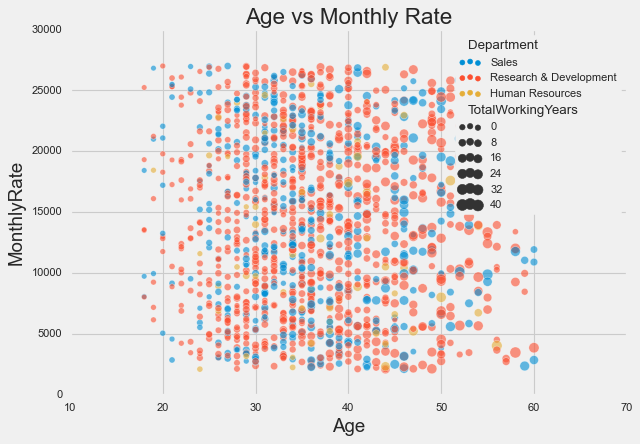

In [20]:
plt.style.use('fivethirtyeight')
# Let's add a size element in the plot

sns.scatterplot(x=df['Age'],
                y=df['MonthlyRate'],
                hue=df['Department'],
                size=df['TotalWorkingYears'],
                alpha=.6)
plt.title('Age vs Monthly Rate');

### Distribution Charts

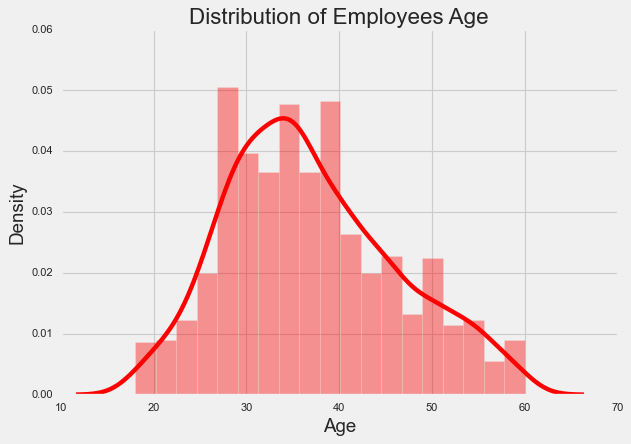

In [21]:
sns.distplot(df['Age'],
             color = 'red')
plt.title('Distribution of Employees Age')
plt.show()

### Box Plots

Both histograms and box plots allow to visually assess the central tendency, the amount of variation in the data as well as the presence of gaps, outliers or unusual data points. They are used to explore and present the data in an easy and understandable manner. 

Histograms are preferred to determine the underlying probability distribution of a data. Box plots are on the other hand more useful when comparing between several data sets.

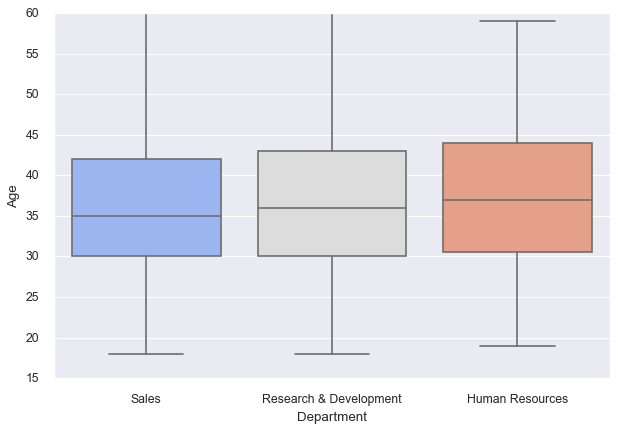

In [22]:
sns.set()
sns.boxplot(df['Department'],
            df['Age'],
            palette='coolwarm');

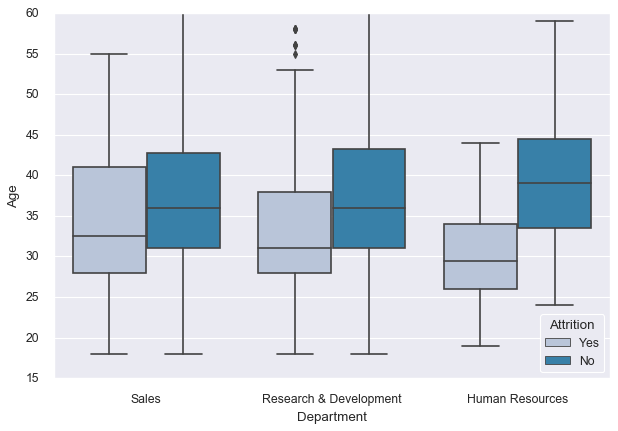

In [23]:
# lets make a box plot with hue element
sns.boxplot(x=df['Department'],
            y=df['Age'],
            hue=df['Attrition'],
            palette='PuBu');

Box plots were originally introduced and popularised by the American mathematician John Wilder Turkey more than 40 years ago. They were designed to be calculated and drawn by hand. As statistics are now being performed by computers, it has become much easier to create more complex variations of this plot such as: 

* [Bean plots](https://cran.r-project.org/web/packages/beanplot/vignettes/beanplot.pdf)
* [Violin plots](https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/)
* [Letter-value plots](http://vita.had.co.nz/papers/letter-value-plot.html)

These variations attempt to convey more information about the distribution, while maintaining the compact size of the box plots. 

### Letter-Value Plots: Boxplots for Large Data

> Conventional boxplots are useful displays for conveying rough information about the central 50% and the extent of data. For small-sized data sets (n < 200), detailed estimates of tail behavior beyond the quartiles may not be trustworthy, so the information provided by boxplots is appropriately somewhat vague beyond the quartiles, and the expected number of "outliers" of size n is often less than 10. Larger data sets (n ~ 10,000-100,000) afford more precise estimates of quantiles beyond the quartiles, but conventional boxplots do not show this information about the tails, and, in addition, show large numbers of extreme, but not unexpected, observations. -- Heike Hofmann

The letter-value plots, also known as "boxenplots" provide a better representation of the distribution of the data than the usual box plots, especially when lots of outliers are present.

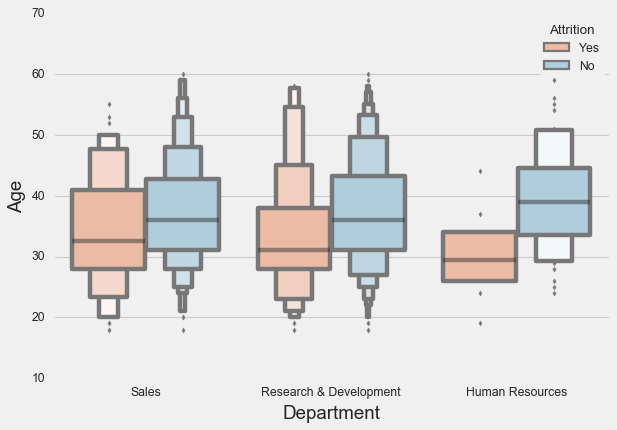

In [24]:
plt.style.use('fivethirtyeight')
# Boxen plot of the same data as above
sns.boxenplot(x=df['Department'],
            y=df['Age'],
            hue=df['Attrition'],
            palette='RdBu');

### Violin Plots

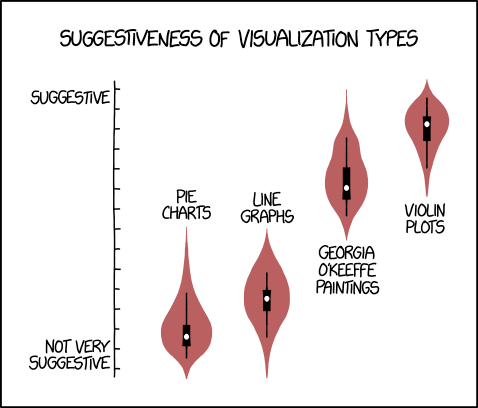
 Source: [xkcd](https://xkcd.com/1967/)
 
A Violin Plot is used to visualise the distribution of the data and its probability density. It has the shape of a violin.  
To compare different sets, their violin plots are palced side by side. They are intuitive and easy to read. The shape of the violin display frequencies of the values. It actually contains all data points. This make it excellent to visualize samples of small sizes. The dot in the middle is the median. They can be used to visualize both quantitative and qualitative data.

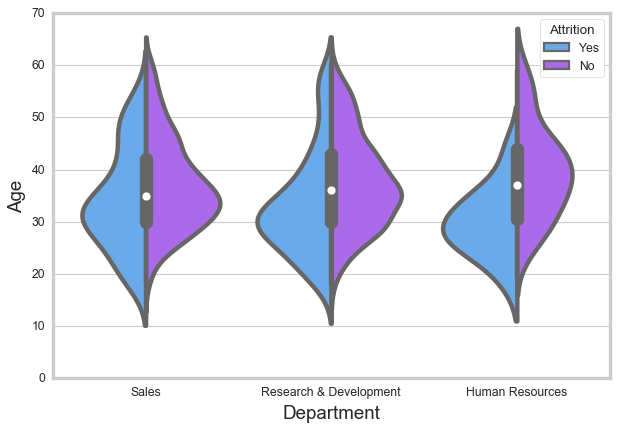

In [25]:
sns.set_style('whitegrid')
# Same data as above
sns.violinplot(x=df['Department'],
            y=df['Age'],
            hue=df['Attrition'],
            palette='cool',
            split=True);

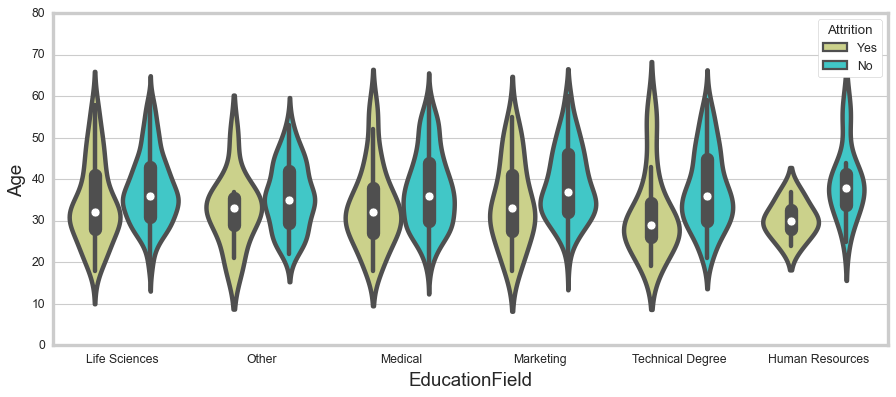

In [26]:
plt.rcParams["figure.figsize"] = 12, 5
sns.violinplot(x=df['EducationField'],
            y=df['Age'],
            hue=df['Attrition'],
            palette='rainbow_r');

### Strip Plots

Strip plots are a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.  
Strip plot always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

In [27]:
# Let's work with another dataset
tips = sns.load_dataset("tips")
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
149,7.51,2.00,Male,No,Thur,Lunch,2
46,22.23,5.00,Male,No,Sun,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
57,26.41,1.50,Female,No,Sat,Dinner,2


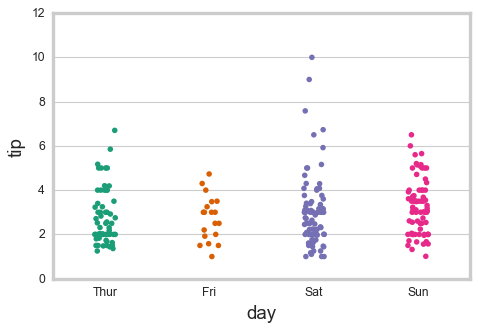

In [28]:
plt.rcParams["figure.figsize"] = 6, 4
sns.stripplot(x=tips['day'],
              y=tips['tip'],
              palette='Dark2');

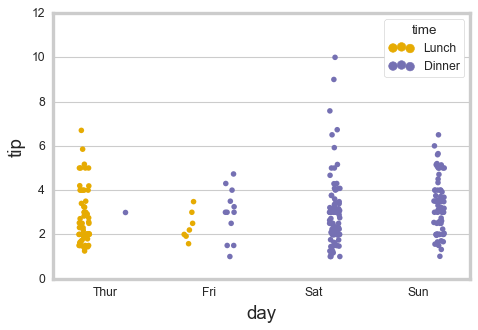

In [29]:
# lets make a simple strip plots with a hue element
sns.stripplot(x=tips['day'],
              y=tips['tip'],
              palette='Dark2_r',
              dodge=True,
              hue=tips['time']);

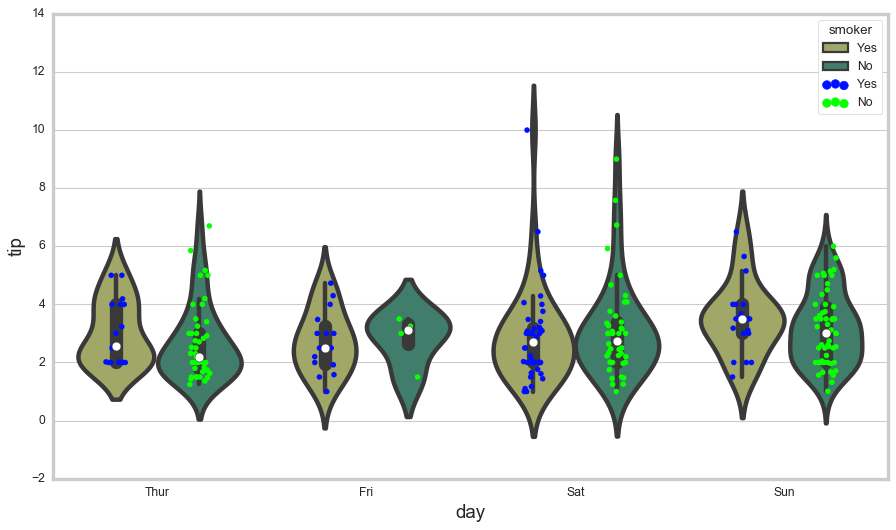

In [31]:
plt.rcParams["figure.figsize"] = 12, 7

g = sns.stripplot(x=tips['day'],
                  y=tips['tip'],
                  palette='hsv_r',
                  dodge=True,
                  hue=tips['smoker'])

sns.violinplot(x=tips['day'],
              y=tips['tip'],
              palette='gist_earth_r',
              dodge=True,
              hue=tips['smoker']);


### Swarm Plots

Swarm plots are similar to strip plots, only the points are adjusted so to represent the distribution of the data. As for the strip plots, swarm plots can be drawn on their own, or as complement to a box plot.

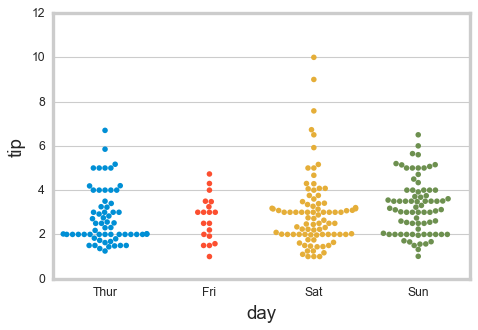

In [32]:
plt.rcParams["figure.figsize"] = 6, 4
sns.swarmplot(x=tips['day'],
              y=tips['tip']);

### Joint Plots

Useful to plot two variables with bivariate and univariate graphs.

>This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.

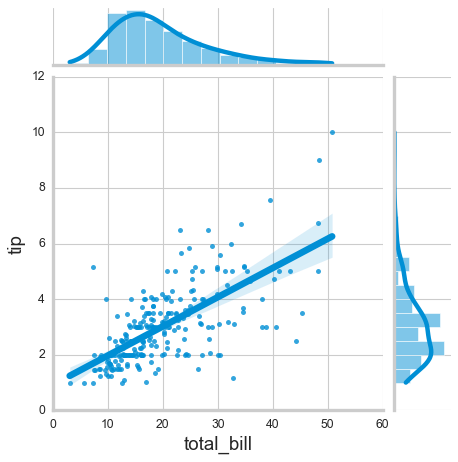

In [34]:
sns.jointplot(x=tips['total_bill'],
              y=tips['tip'],
             kind="reg")

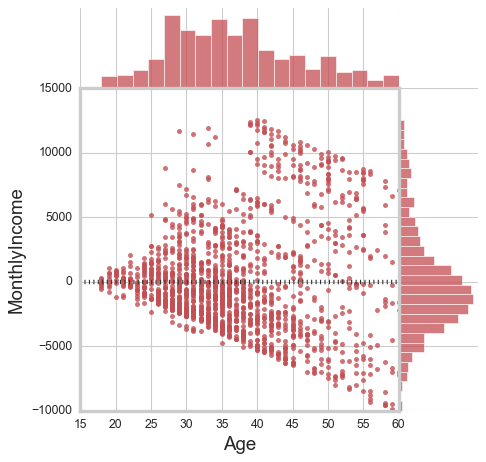

In [35]:
sns.jointplot(x='Age',
              y='MonthlyIncome',
              data=df,
              kind="resid",
              color='r',
              space=0,
              ratio=4 );

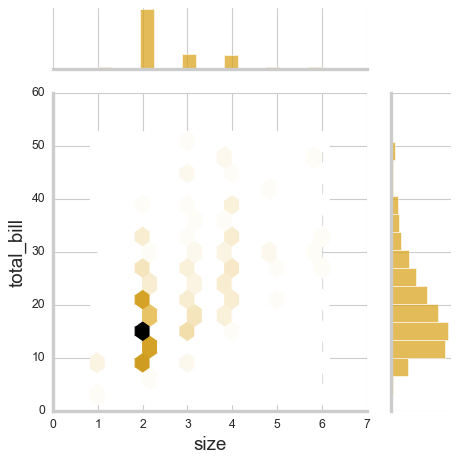

In [38]:
sns.jointplot(x='size',
              y='total_bill',
              data=tips,
              kind="hex",
              color='goldenrod',
              space=.4,
              ratio=4 );

### Heat Maps

## References:

[1] [Notebook](https://github.com/sharmaroshan/Data-Visualizations/blob/master/06.%20Introduction%20to%20Seaborn.ipynb) by Roshan Sharma  
[2] [Box Plot Variations](https://datavizcatalogue.com/blog/box-plot-variations/)  
[3] [Boxplots & Beyond IV](https://www.r-bloggers.com/2011/03/boxplots-beyond-iv-beanplots/)  
[4] [Violin Plot](https://datavizcatalogue.com/methods/violin_plot.html)
